In [16]:
#ClassActivity5

In [ ]:
#trying K-fold, what's taught in class today,
#Date: 3/25/2024

In [2]:
#its a class activity

Depth: 1, Training Error: 0.1100, Validation Error: 0.1650
Depth: 2, Training Error: 0.1050, Validation Error: 0.1600
Depth: 3, Training Error: 0.0983, Validation Error: 0.1600
Depth: 4, Training Error: 0.0583, Validation Error: 0.1700
Depth: 5, Training Error: 0.0450, Validation Error: 0.1750
Depth: 6, Training Error: 0.0233, Validation Error: 0.1800
Depth: 7, Training Error: 0.0117, Validation Error: 0.1850
Depth: 8, Training Error: 0.0050, Validation Error: 0.2100
Depth: 9, Training Error: 0.0000, Validation Error: 0.2100
Depth: 10, Training Error: 0.0000, Validation Error: 0.2100
Depth: 11, Training Error: 0.0000, Validation Error: 0.2100
Depth: 12, Training Error: 0.0000, Validation Error: 0.2100
Depth: 13, Training Error: 0.0000, Validation Error: 0.2100
Depth: 14, Training Error: 0.0000, Validation Error: 0.2100
Depth: 15, Training Error: 0.0000, Validation Error: 0.2100
Depth: 16, Training Error: 0.0000, Validation Error: 0.2100
Depth: 17, Training Error: 0.0000, Validation Err

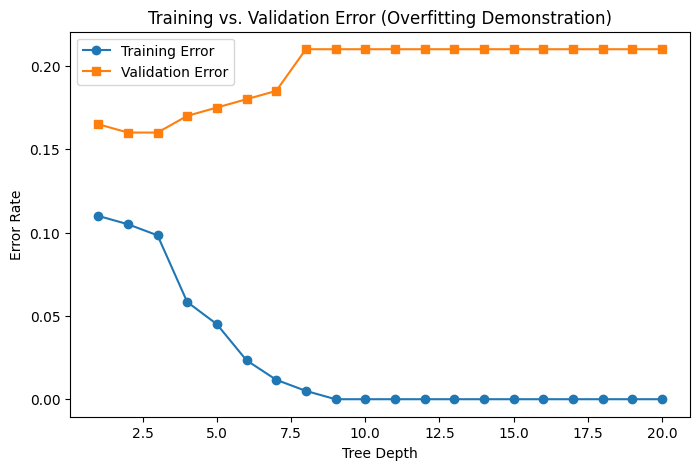

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class DecisionTree:
    def __init__(self, max_depth=10):
        self.max_depth = max_depth
        self.root = None

    def fit(self, X, y):
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        num_classes = len(np.unique(y))

        if depth >= self.max_depth or num_classes == 1:
            return Node(value=self._most_common_label(y))
        
        best_feature, best_threshold = self._best_split(X, y)
        if best_feature is None:
            return Node(value=self._most_common_label(y))
        
        left_indices = X[:, best_feature] < best_threshold
        right_indices = ~left_indices

        left_child = self._grow_tree(X[left_indices], y[left_indices], depth + 1)
        right_child = self._grow_tree(X[right_indices], y[right_indices], depth + 1)

        return Node(best_feature, best_threshold, left_child, right_child)

    def _best_split(self, X, y):
        best_gini = 1.0
        best_feature, best_threshold = None, None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = ~left_indices
                
                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue
                
                gini = self._gini_impurity(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature, best_threshold = feature, threshold
        
        return best_feature, best_threshold

    def _gini_impurity(self, left_labels, right_labels):
        def gini(y):
            _, counts = np.unique(y, return_counts=True)
            probs = counts / counts.sum()
            return 1 - np.sum(probs ** 2)
        
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size
        return (left_size / total_size) * gini(left_labels) + (right_size / total_size) * gini(right_labels)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        return self._traverse_tree(x, node.left if x[node.feature] < node.threshold else node.right)

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split into training (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

training_errors = []
validation_errors = []

# Train custom decision tree with increasing depth
max_depth_range = range(1, 21)

for depth in max_depth_range:
    model = DecisionTree(max_depth=depth)
    model.fit(X_train, y_train)

    # Compute errors
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)

    train_error = 1 - accuracy_score(y_train, train_pred)
    val_error = 1 - accuracy_score(y_val, val_pred)

    training_errors.append(train_error)
    validation_errors.append(val_error)

    print(f"Depth: {depth}, Training Error: {train_error:.4f}, Validation Error: {val_error:.4f}")

# Plot training and validation errors
plt.figure(figsize=(8, 5))
plt.plot(max_depth_range, training_errors, label="Training Error", marker='o')
plt.plot(max_depth_range, validation_errors, label="Validation Error", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Error Rate")
plt.legend()
plt.title("Training vs. Validation Error (Overfitting Demonstration)")
plt.show()

In [ ]:
#The code was created using ChatGPT (the entire code) = https://chatgpt.com
#The dataset was a synthetic one (created with the help of sklearn (make classification))


#The Overfitting started at the node 3: because that was when the validation error started going up even though the training error was decreasing.
#Cause as we know the overfitting is model getting too comfortable with training data that it doesn't go well with even small noises/outliers 

'''Depth: 1, Training Error: 0.1100, Validation Error: 0.1650
Depth: 2, Training Error: 0.1050, Validation Error: 0.1600
Depth: 3, Training Error: 0.0983, Validation Error: 0.1600''' #this was the learning stage of the model


'''Depth: 4, Training Error: 0.0583, Validation Error: 0.1700
Depth: 5, Training Error: 0.0450, Validation Error: 0.1750
Depth: 6, Training Error: 0.0233, Validation Error: 0.1800
Depth: 7, Training Error: 0.0117, Validation Error: 0.1850
Depth: 8, Training Error: 0.0050, Validation Error: 0.2100
Depth: 9, Training Error: 0.0000, Validation Error: 0.2100'''  #this was the point where the model completely learned the dataset (overfitted)

'''
Depth: 10, Training Error: 0.0000, Validation Error: 0.2100
Depth: 11, Training Error: 0.0000, Validation Error: 0.2100
Depth: 12, Training Error: 0.0000, Validation Error: 0.2100
Depth: 13, Training Error: 0.0000, Validation Error: 0.2100
Depth: 14, Training Error: 0.0000, Validation Error: 0.2100
Depth: 15, Training Error: 0.0000, Validation Error: 0.2100
Depth: 16, Training Error: 0.0000, Validation Error: 0.2100
Depth: 17, Training Error: 0.0000, Validation Error: 0.2100
Depth: 18, Training Error: 0.0000, Validation Error: 0.2100
Depth: 19, Training Error: 0.0000, Validation Error: 0.2100
Depth: 20, Training Error: 0.0000, Validation Error: 0.2100''' #this is just the straight line showing that the rest of the nodes had no new data to learn as the model completely learned the dataset.
